# draft

## import 

In [1]:
import numpy as np 
import pandas as pd 
#import warnings
from IPython.display import HTML

In [2]:
#
#!pip install pandas_datareader 
from pandas_datareader import data as pdr 

## pd backend: Line

### 예제1: 

`-` yahoo finance: https://finance.yahoo.com/

In [66]:
symbols = ['AMZN','AAPL','GOOG','MSFT','NFLX','NVDA','TSLA']
start = '2020-01-01'
end = '2022-10-30'
df = pdr.get_data_yahoo(symbols,start,end)['Adj Close']

In [67]:
df

Symbols,AMZN,AAPL,GOOG,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,
2019-12-31,92.391998,71.920570,66.850998,153.745239,323.570007,58.637024,27.888666
2020-01-02,94.900497,73.561539,68.368500,156.592010,329.809998,59.785847,28.684000
2020-01-03,93.748497,72.846367,68.032997,154.642166,325.899994,58.828911,29.534000
2020-01-06,95.143997,73.426826,69.710503,155.041885,335.829987,59.075623,30.102667
2020-01-07,95.343002,73.081490,69.667000,153.628250,330.750000,59.790821,31.270666
...,...,...,...,...,...,...,...
2022-10-24,119.820000,149.202484,102.970001,247.250000,282.450012,125.989998,211.250000
2022-10-25,120.599998,152.087708,104.930000,250.660004,291.019989,132.610001,222.419998
2022-10-26,115.660004,149.102661,94.820000,231.320007,298.619995,128.960007,224.639999


`-` 1개의 y를 그리기

<AxesSubplot:xlabel='Date'>

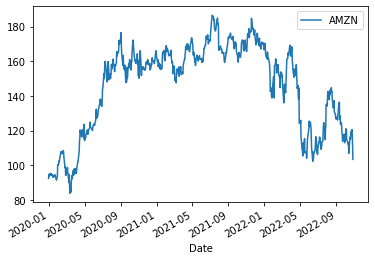

In [68]:
df.reset_index().plot(x='Date',y='AMZN',kind='line')

<AxesSubplot:xlabel='Date'>

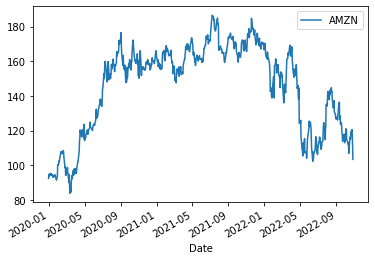

In [69]:
df.reset_index().plot(x='Date',y='AMZN')

<AxesSubplot:xlabel='Date'>

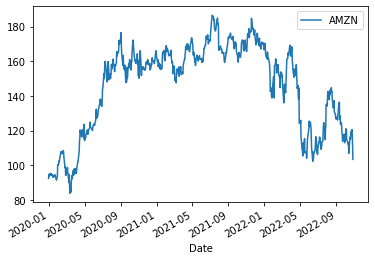

In [70]:
df.reset_index().plot.line(x='Date',y='AMZN')

`-` 2개의 y를 겹쳐그리기

<AxesSubplot:xlabel='Date'>

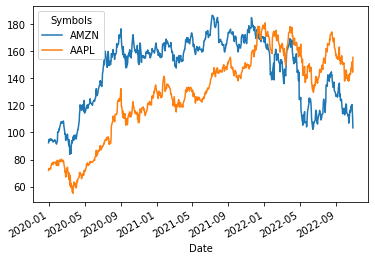

In [71]:
df.reset_index().plot.line(x='Date',y=['AMZN','AAPL'])

`-` 모든 y를 겹쳐서 그리기

<AxesSubplot:xlabel='Date'>

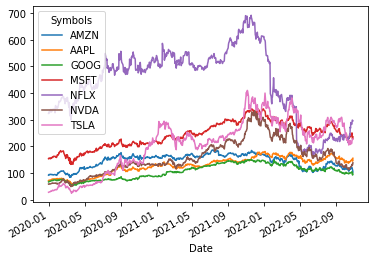

In [72]:
df.reset_index().plot.line(x='Date')

`-` 모든 y를 겹쳐서 그리기 + 그림크기조정 

<AxesSubplot:xlabel='Date'>

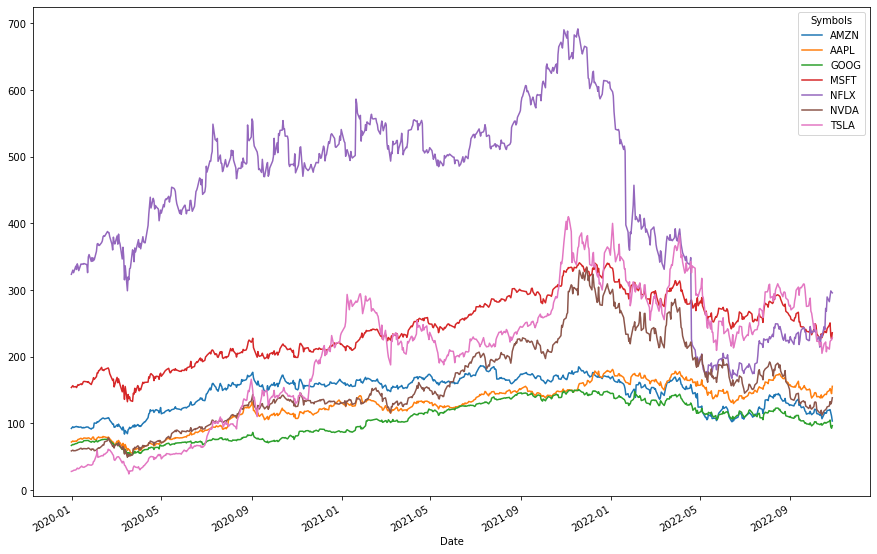

In [73]:
df.reset_index().plot.line(x='Date',figsize=(15,10))

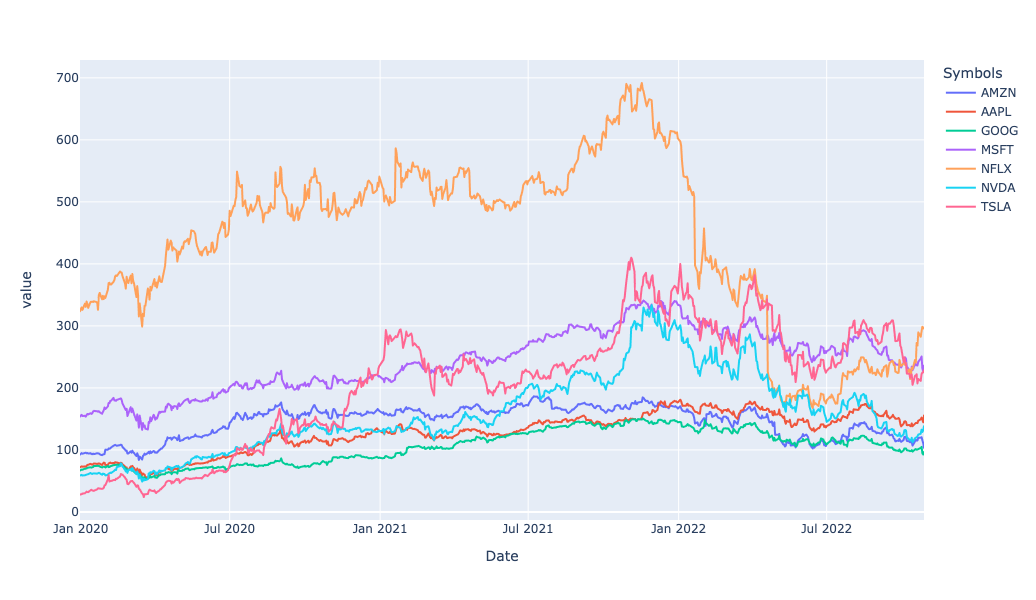

In [89]:
df.reset_index().melt(id_vars='Date').plot.line(x='Date',y='value',color='Symbols',backend='plotly',height=600)

`-` 서브플랏 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

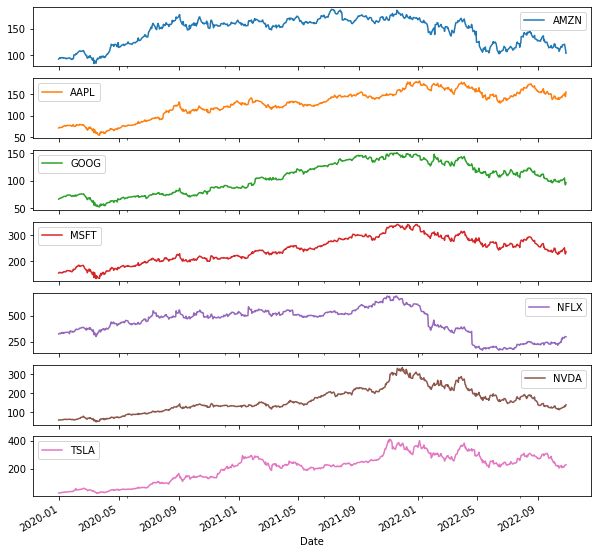

In [29]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True)

`-` 레이아웃 조정 

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

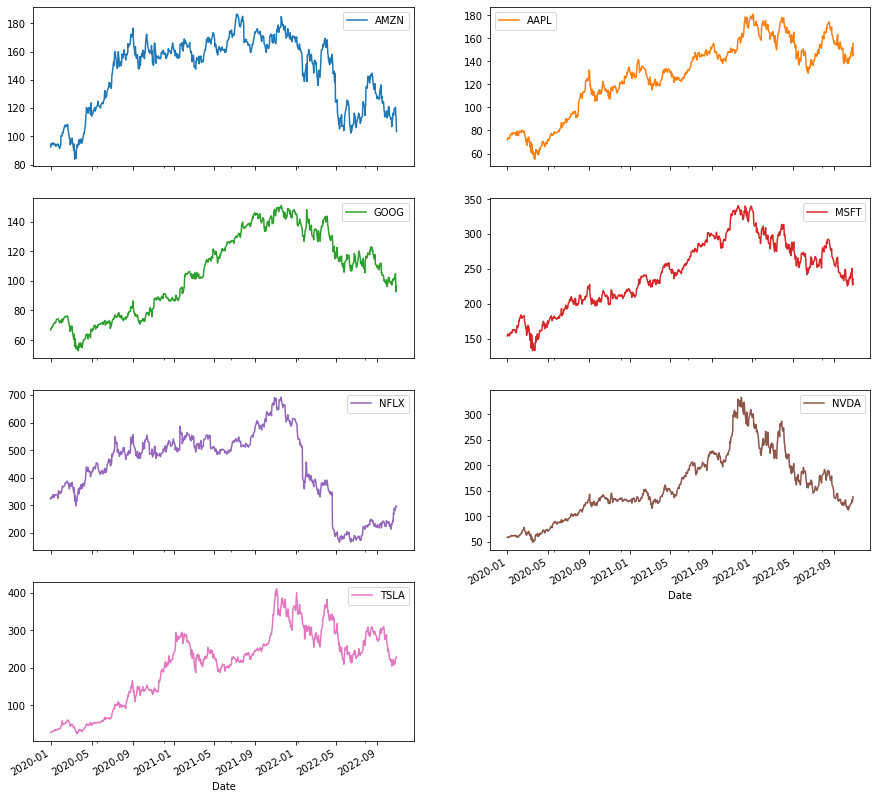

In [34]:
df.reset_index().plot.line(x='Date',figsize=(15,15),subplots=True,layout=(4,2))

`-` 폰트조정 

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

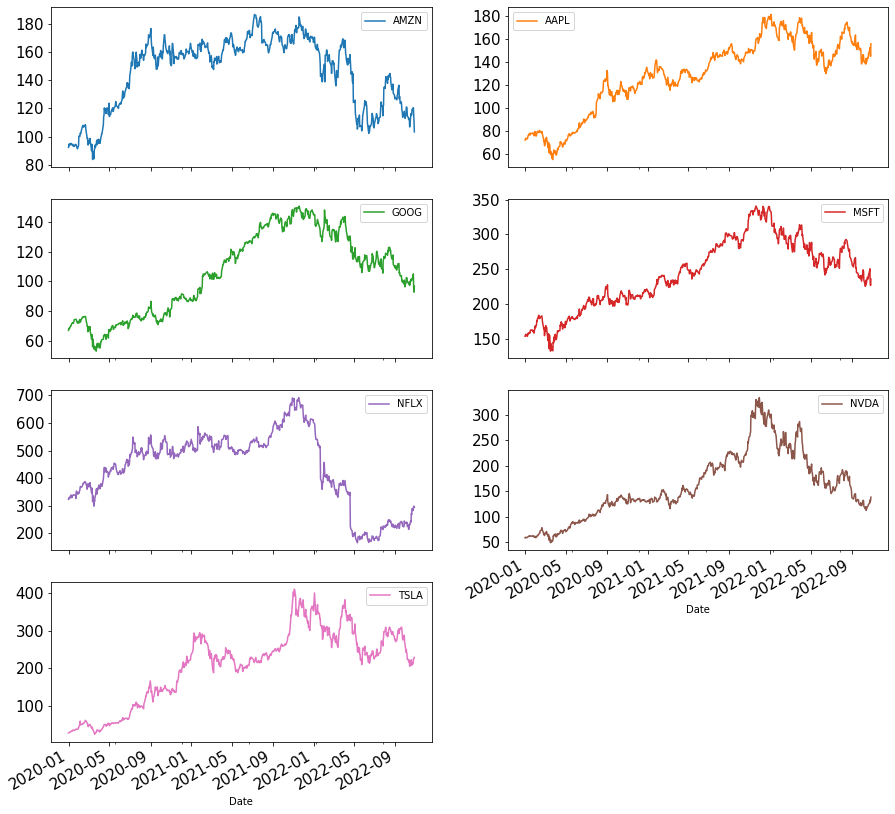

In [33]:
df.reset_index().plot.line(x='Date',figsize=(15,15),subplots=True,layout=(4,2),fontsize=15)

`-` 레전드삭제 

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

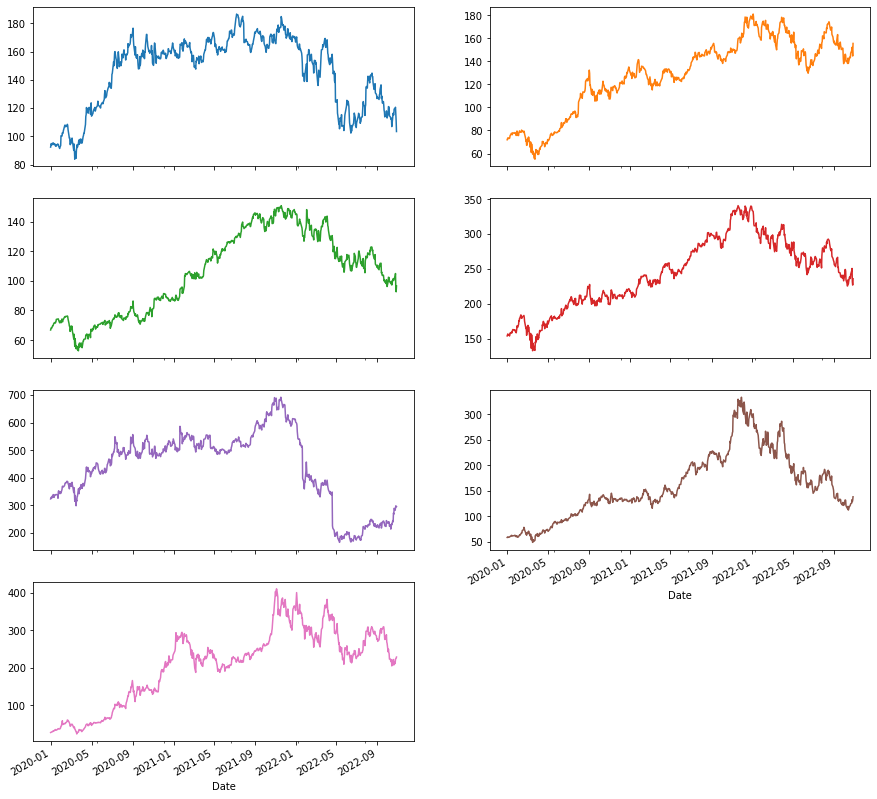

In [36]:
df.reset_index().plot.line(x='Date',figsize=(15,15),subplots=True,layout=(4,2),legend=False)

## pd backend: bar, barh

### 예제1

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


`-` 

<AxesSubplot:xlabel='Date'>

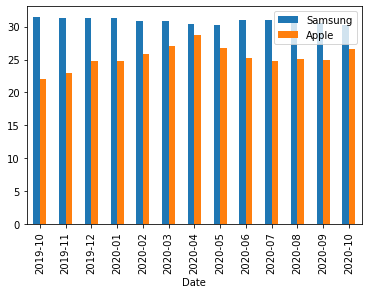

In [92]:
df.plot.bar(x='Date',y=['Samsung','Apple'])

`-` 폭조정

<AxesSubplot:xlabel='Date'>

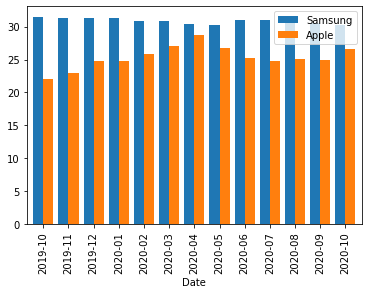

In [93]:
df.plot.bar(x='Date',y=['Samsung','Apple'],width=0.8)

<AxesSubplot:ylabel='Date'>

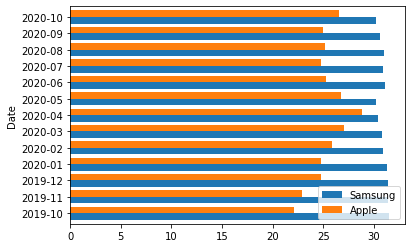

In [94]:
df.plot.barh(x='Date',y=['Samsung','Apple'],width=0.8)

`-` 

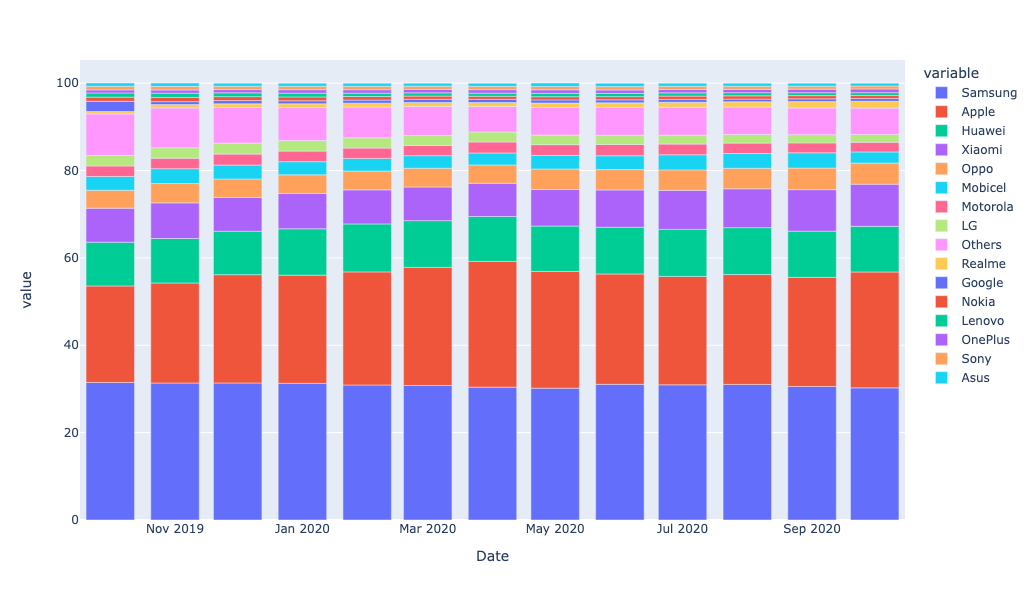

In [95]:
df.melt(id_vars='Date').plot.bar(x='Date',y='value',color='variable',backend='plotly',width=800,height=600)

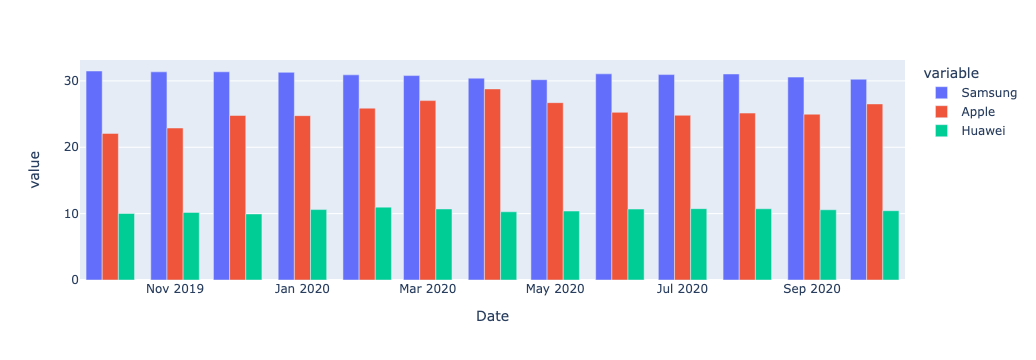

In [96]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(x='Date',y='value',color='variable',backend='plotly',barmode='group')

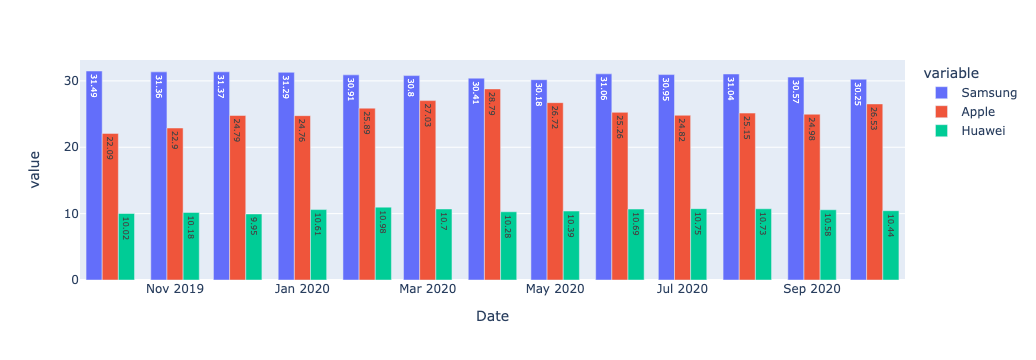

In [97]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'" ).\
plot.bar(x='Date',y='value',color='variable',backend='plotly',barmode='group',text='value')

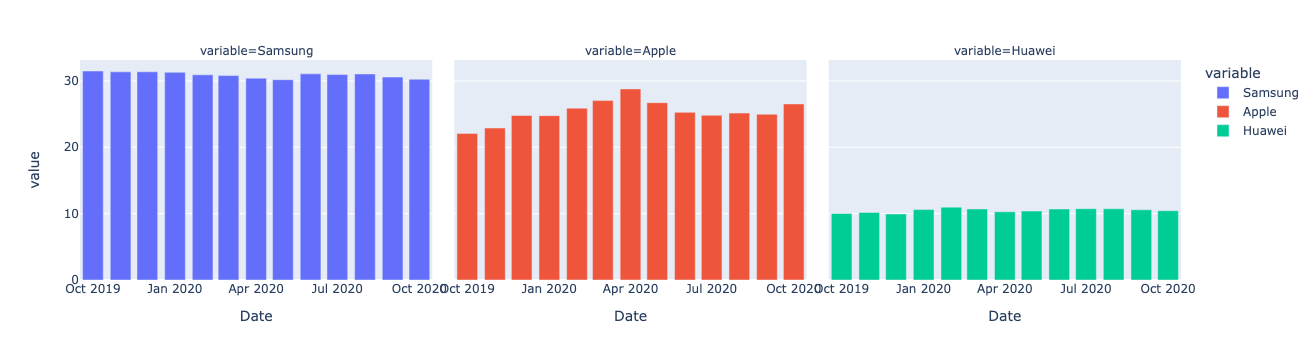

In [98]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'" ).\
plot.bar(x='Date',y='value',color='variable',backend='plotly',facet_col='variable')

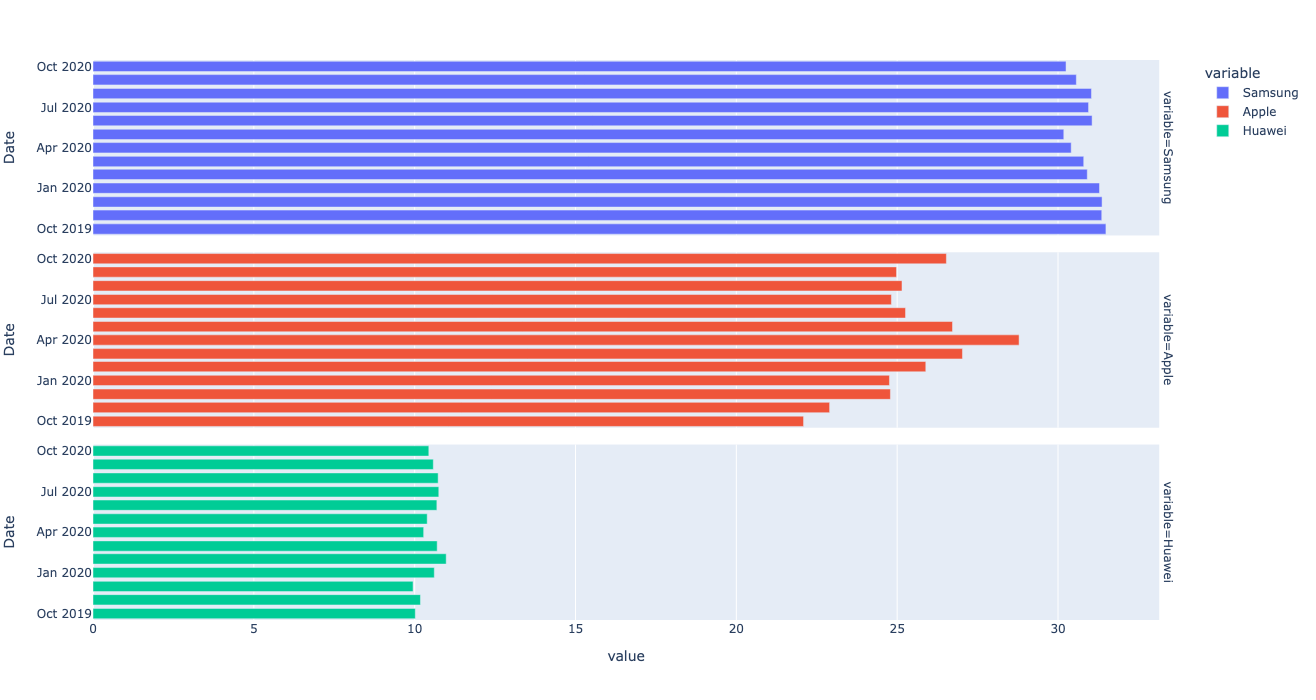

In [99]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'" ).\
plot.bar(y='Date',x='value',color='variable',backend='plotly',facet_row='variable',height=700)

## pie plot

### 예제1

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


<AxesSubplot:ylabel='2019-10'>

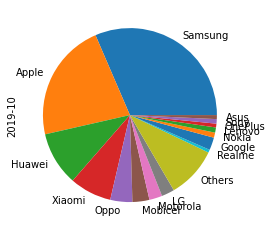

In [102]:
#df.set_index('Date').plot.pie(y='Apple')
df.set_index('Date').T.plot.pie(y='2019-10',legend=False)

array([[<AxesSubplot:ylabel='2019-10'>, <AxesSubplot:ylabel='2019-11'>,
        <AxesSubplot:ylabel='2019-12'>, <AxesSubplot:ylabel='2020-01'>],
       [<AxesSubplot:ylabel='2020-02'>, <AxesSubplot:ylabel='2020-03'>,
        <AxesSubplot:ylabel='2020-04'>, <AxesSubplot:ylabel='2020-05'>],
       [<AxesSubplot:ylabel='2020-06'>, <AxesSubplot:ylabel='2020-07'>,
        <AxesSubplot:ylabel='2020-08'>, <AxesSubplot:ylabel='2020-09'>],
       [<AxesSubplot:ylabel='2020-10'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

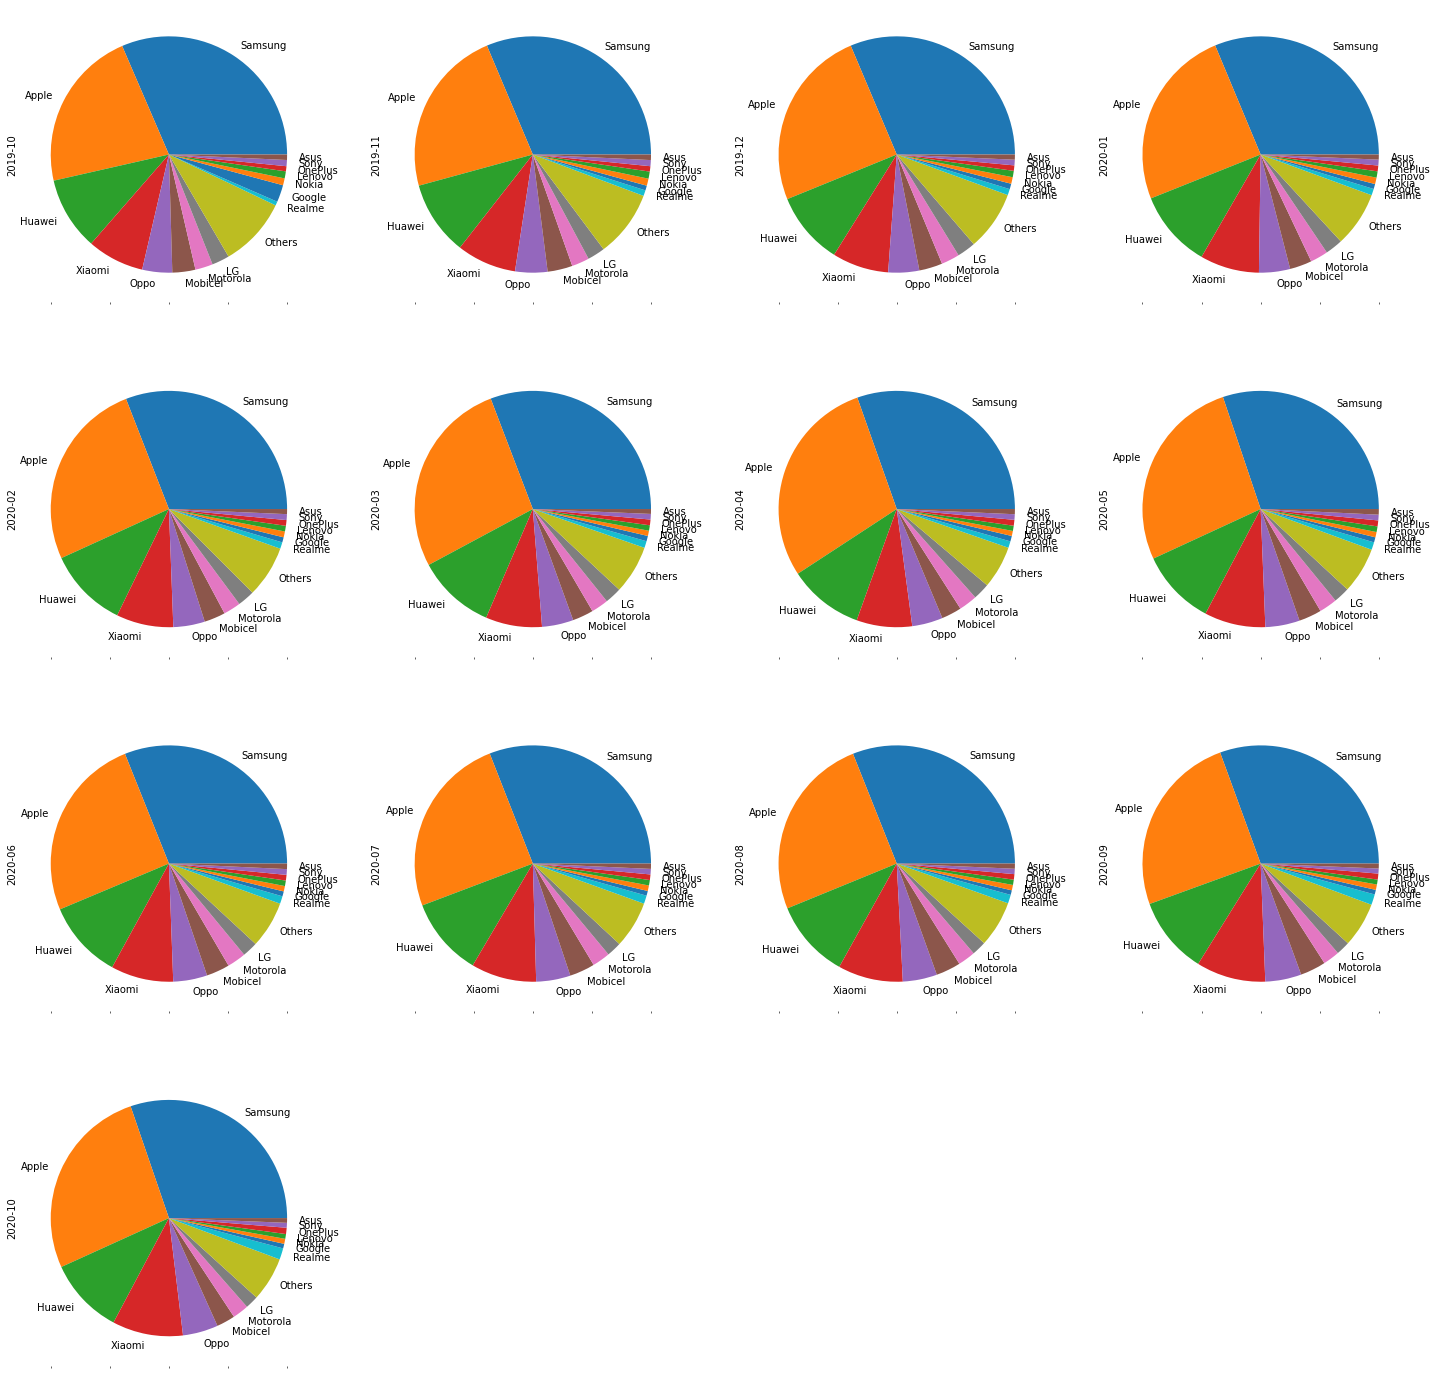

In [105]:
df.set_index('Date').T.plot.pie(legend=False,subplots=True,layout=(4,4),figsize=(25,25))

## boxplot 

### 예제1